In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_full = pd.read_csv("cleandata.csv", sep=(","))

In [2]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_full,
 test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  816 Test size:  204


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['AVG_SCORE', 'EXPENSE_PER_STUDENT']]
y = train_set['TEST_YEAR']

X_test = test_set[['AVG_SCORE','EXPENSE_PER_STUDENT']]
y_test = test_set['TEST_YEAR']

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X,y)

y_pred = rf_model.predict(X)


print('Results for Random Forest on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for Random Forest on training data
  Default settings
Confusion Matrix
[[402   0]
 [  0 414]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0

Results for Random Forest on test data
  Default settings
Confusion Matrix
[[108   0]
 [  1  95]]
Accuracy is   0.9950980392156863
Precision is  0.9951430113329736
Recall is     0.9950980392156863
F1 is         0.995096501698129


In [13]:
#Elastic Net with Poly features
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 10
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['AVG_SCORE']]
y = train_set['EXPENSE_PER_STUDENT']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['AVG_SCORE']]
y_test = test_set['EXPENSE_PER_STUDENT']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  10
 Default settings
Internal parameters:
 Bias is  -38.433410859719125
 Coefficients [ 2.61377555e-01  8.99593313e-05 -1.01487591e-06 -2.23583415e-09
 -4.68050190e-12 -7.98701642e-15 -4.09453939e-18  5.59276552e-20
  4.06442975e-22  2.05881458e-24]
 Score 0.07836512704798027
MAE is  1.3765120937467028
RMSE is  1.9391446326028525
MSE is  3.7602819061524517
R^2  0.07836512704798027

Results for elastic net on test data
MAE is  1.3273934928944617
RMSE is  1.8203504846370995
MSE is  3.313675886918523
R^2  0.0824024870656308


C:\Users\alhal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+03, tolerance: 3.329e-01
  model = cd_fast.enet_coordinate_descent(


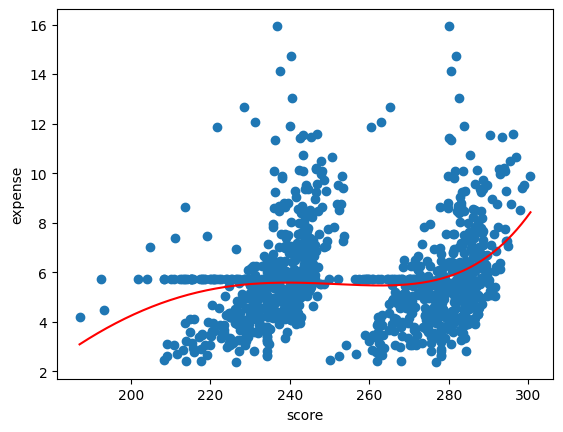

In [14]:
#Elastic Net Graph
import matplotlib.pyplot as plt
score = data_full['AVG_SCORE']
expense = data_full['EXPENSE_PER_STUDENT']
#gender = howell_full['male']

min_score = score.min()
max_score = score.max()
points = 200
step_by = (max_score - min_score)/(points-1)

x_values = [min_score + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = reg_lr_model.predict(inputs_poly)


plt.scatter(score, expense)
plt.xlabel('score')
plt.ylabel('expense')
plt.plot(x_values, y_values, c='red')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 14
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['AVG_SCORE']]
y = train_set['EXPENSE_PER_STUDENT']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['AVG_SCORE']]
y_test = test_set['EXPENSE_PER_STUDENT']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  14
 Default settings
Internal parameters:
 Bias is  20.480871509883915
 Coefficients [-4.19151483e-40 -4.74145485e-24  2.04985472e-26  4.85385533e-30
 -1.33385936e-30 -2.21014887e-28 -3.20670998e-26 -3.92115653e-24
 -3.68436405e-22 -2.05866797e-20  2.95058717e-22 -1.58960693e-24
  3.81160726e-27 -3.42968845e-30]
 Score 0.15787979828191734
MAE is  1.3157732343858175
RMSE is  1.8536075756766022
MSE is  3.4358610446056903
R^2  0.15787979828191734

Results for linear regression on test data
MAE is  1.2683323690154886
RMSE is  1.6989272640477042
MSE is  2.886353848524618
R^2  0.20073320287288066


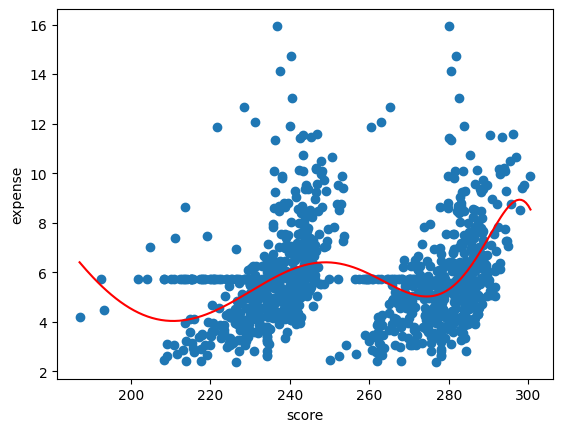

In [29]:
import matplotlib.pyplot as plt
score = data_full['AVG_SCORE']
expense = data_full['EXPENSE_PER_STUDENT']
#gender = howell_full['male']

min_score = score.min()
max_score = score.max()
points = 200
step_by = (max_score - min_score)/(points-1)

x_values = [min_score + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)


plt.scatter(score, expense)
plt.xlabel('score')
plt.ylabel('expense')
plt.plot(x_values, y_values, c='red')
plt.show()


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['AVG_SCORE', 'TEST_YEAR']]
y = train_set['EXPENSE_PER_STUDENT']
X_test = test_set[['AVG_SCORE', 'TEST_YEAR']]
y_test = test_set['EXPENSE_PER_STUDENT']

lrTwoInput_model = LinearRegression()
lrTwoInput_model.fit(X,y)

y_pred = lrTwoInput_model.predict(X)
print('Results for linear regression on training data')
print('Input: Score, Test Year')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lrTwoInput_model.intercept_)
print(' Coefficients', lrTwoInput_model.coef_)
print(' Score', lrTwoInput_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lrTwoInput_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('Input: Score, Test Year')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Input: Score, Test Year
 Default settings
Internal parameters:
 Bias is  -8.982018401372585
 Coefficients [ 0.07699569 -0.83706805]
 Score 0.15262824960105847
MAE is  1.343334327505814
RMSE is  1.8593782373312229
MSE is  3.4572874294609655
R^2  0.15262824960105847

Results for linear regression on test data
Input: Score, Test Year
MAE is  1.3280942163231917
RMSE is  1.7736128203896422
MSE is  3.145702436650501
R^2  0.12891639653197684


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
#train linear regression model
X = train_set[['EXPENSE_PER_STUDENT']]
y = train_set['AVG_SCORE']
X_test = test_set[['EXPENSE_PER_STUDENT']]
y_test = test_set['AVG_SCORE']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  245.21119989437204
 Coefficients [1.95753026]
 Score 0.027186122328814788
MAE is  21.989273426035776
RMSE is  23.652686818243364
MSE is  559.4495937219034
R^2  0.027186122328814788

Results for linear regression on test data
MAE is  22.939321141067396
RMSE is  24.320915010214062
MSE is  591.5069069340557
R^2  0.020629499804879603


C:\Users\alhal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


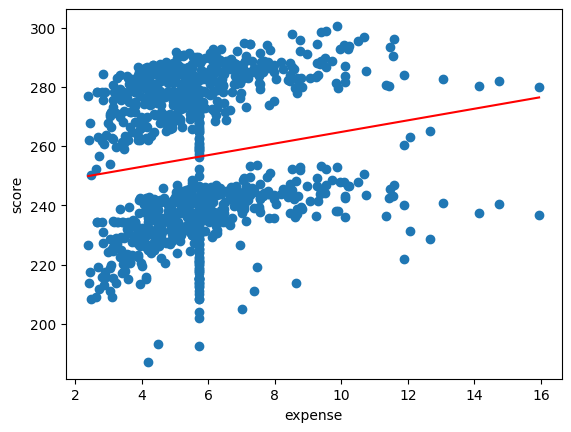

In [70]:
#plot linear model
import matplotlib.pyplot as plt
expense = data_full['EXPENSE_PER_STUDENT']
score = data_full['AVG_SCORE']
#gender = howell_full['male']

min_expense = expense.min()
max_expense = expense.max()
points = 200
step_by = (max_expense - min_expense)/(points-1)

x_values = [min_expense + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)


plt.scatter(expense, score)
plt.xlabel('expense')
plt.ylabel('score')
plt.plot(x_values, y_values, c='red')
plt.show()

In [72]:
#Polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 2
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['EXPENSE_PER_STUDENT']]
y = train_set['AVG_SCORE']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['EXPENSE_PER_STUDENT']]
y_test = test_set['AVG_SCORE']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  2
 Default settings
Internal parameters:
 Bias is  230.27621261401274
 Coefficients [ 6.65230448 -0.32368951]
 Score 0.03707252453671006
MAE is  21.972471697018822
RMSE is  23.532192482517843
MSE is  553.7640830342692
R^2  0.03707252453671006

Results for linear regression on test data
MAE is  22.989401662621308
RMSE is  24.363298011557273
MSE is  593.5702899999505
R^2  0.017213112808125874


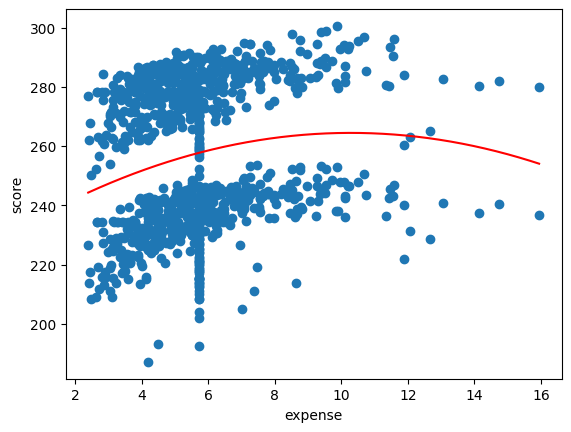

In [73]:
import matplotlib.pyplot as plt
score = data_full['AVG_SCORE']
expense = data_full['EXPENSE_PER_STUDENT']
#gender = howell_full['male']

min_expense = expense.min()
max_expense = expense.max()
points = 200
step_by = (max_expense - min_expense)/(points-1)

x_values = [min_expense + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)


plt.scatter(expense, score)
plt.xlabel('expense')
plt.ylabel('score')
plt.plot(x_values, y_values, c='red')
plt.show()


In [82]:
#Polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 6
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['EXPENSE_PER_STUDENT']]
y = train_set['AVG_SCORE']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['EXPENSE_PER_STUDENT']]
y_test = test_set['AVG_SCORE']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  6
 Default settings
Internal parameters:
 Bias is  71.87970239350827
 Coefficients [ 1.44303432e+02 -4.59876798e+01  7.43259072e+00 -6.29036584e-01
  2.63990089e-02 -4.31940012e-04]
 Score 0.04046975865962954
MAE is  21.9749708248379
RMSE is  23.49064469960733
MSE is  551.81038840319
R^2  0.04046975865962954

Results for linear regression on test data
MAE is  22.937346429379208
RMSE is  24.31029609542666
MSE is  590.9904962473167
R^2  0.021484531904503168


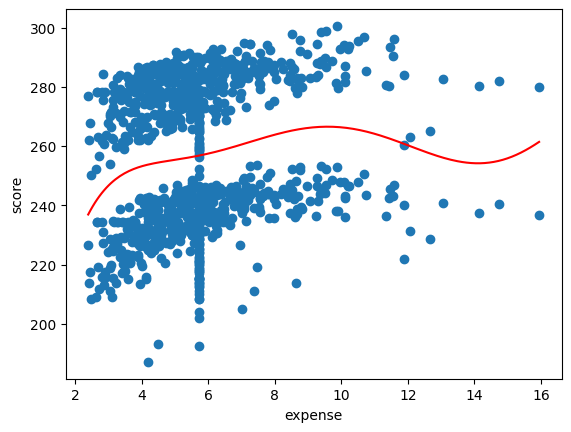

In [83]:
import matplotlib.pyplot as plt
score = data_full['AVG_SCORE']
expense = data_full['EXPENSE_PER_STUDENT']
#gender = howell_full['male']

min_expense = expense.min()
max_expense = expense.max()
points = 200
step_by = (max_expense - min_expense)/(points-1)

x_values = [min_expense + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)


plt.scatter(expense, score)
plt.xlabel('expense')
plt.ylabel('score')
plt.plot(x_values, y_values, c='red')
plt.show()


In [84]:
#2 variable linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y = train_set['AVG_SCORE']
X_test = test_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y_test = test_set['AVG_SCORE']

lrTwoInput_model = LinearRegression()
lrTwoInput_model.fit(X,y)

y_pred = lrTwoInput_model.predict(X)
print('Results for linear regression on training data')
print('Input: Expense, Test Year')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lrTwoInput_model.intercept_)
print(' Coefficients', lrTwoInput_model.coef_)
print(' Score', lrTwoInput_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lrTwoInput_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('Input: Expense, Test Year')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Input: Expense, Test Year
 Default settings
Internal parameters:
 Bias is  179.6748009124244
 Coefficients [ 1.98223774 10.84604436]
 Score 0.8452275682051464
MAE is  7.115020587469477
RMSE is  9.43435916688901
MSE is  89.00713288986269
R^2  0.8452275682051464

Results for linear regression on test data
Input: Expense, Test Year
MAE is  6.719951640034663
RMSE is  8.89734075805416
MSE is  79.16267256493175
R^2  0.868928688206606


In [86]:
#Polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 6
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y = train_set['AVG_SCORE']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y_test = test_set['AVG_SCORE']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  6
 Default settings
Internal parameters:
 Bias is  8.491269220772438
 Coefficients [ 9.04090731e-03  2.99191113e-09 -4.40140267e-02  3.49783131e-02
  3.58708371e-08  1.01365998e-01 -1.64131945e-01  1.30430723e-01
  3.34791614e-07 -1.04496908e-01  3.46642551e-01 -5.61134488e-01
  4.45862657e-01  2.86964181e-06  3.66790153e-02 -2.76772850e-01
  9.15998676e-01 -1.48139161e+00  1.17656875e+00  2.37223719e-05
 -6.40718011e-04  1.28669647e-04  2.26268577e-02 -1.00577528e-01
  1.79604285e-01 -1.48780046e-01  1.92839931e-04]
 Score 0.8587784993249336
MAE is  6.656683596511812
RMSE is  9.011892733651335
MSE is  81.21421064283773
R^2  0.8587784993249336

Results for linear regression on test data
MAE is  6.602485081699719
RMSE is  8.810855094985389
MSE is  77.63116750482997
R^2  0.8714644335363396


In [91]:
#Polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 2
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y = train_set['AVG_SCORE']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y_test = test_set['AVG_SCORE']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  2
 Default settings
Internal parameters:
 Bias is  192.7557169519023
 Coefficients [ 6.90649912  0.07828486 -0.30235392 -0.0898886   0.93941831]
 Score 0.854064256323466
MAE is  6.7838910131878745
RMSE is  9.161075038952918
MSE is  83.92529586932619
R^2  0.854064256323466

Results for linear regression on test data
MAE is  6.5273857549967715
RMSE is  8.821396552413258
MSE is  77.81703713492851
R^2  0.8711566852573817


In [101]:
#Elastic Net with Poly features
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 6
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y = train_set['AVG_SCORE']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['EXPENSE_PER_STUDENT', 'TEST_YEAR']]
y_test = test_set['AVG_SCORE']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  6
 Default settings
Internal parameters:
 Bias is  209.51761457115742
 Coefficients [ 0.00000000e+00  0.00000000e+00  3.05306000e-01  5.17428936e-01
  2.94870102e-01 -2.51177858e-02  3.41970101e-02  1.14818417e-02
  1.76981762e-02 -2.16459109e-03  1.67703944e-03 -7.85187510e-04
 -2.87749106e-03  2.09572725e-03  1.33827759e-06 -2.10138511e-06
  1.39427237e-04 -2.38144988e-04 -3.35631150e-04  3.03472001e-04
  8.61092257e-06 -1.45726094e-05  6.06074125e-06  1.55650889e-05
 -3.10883797e-05 -3.78231251e-05  3.88081381e-05]
 Score 0.8547747791055283
MAE is  6.761306991479674
RMSE is  9.138746394361096
MSE is  83.51668566044793
R^2  0.8547747791055283

Results for elastic net on test data
MAE is  6.562453595934035
RMSE is  8.851493658114228
MSE is  78.34893997963638
R^2  0.8702760024640448


C:\Users\alhal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.425e+04, tolerance: 4.693e+01
  model = cd_fast.enet_coordinate_descent(
